In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
escalon = lambda x: 0 if x < 0 else 1
pArr=np.array([[103, 69, 68],
            [103, 76, 68],
            [103, 75, 68],
            [103, 75, 68],
            [103, 75, 62],
            [103, 75, 68],
            [104, 69, 68],
            [104, 75, 68],
            [104, 75, 68],
            [103, 75, 68],
            [103, 75, 68],
            [103, 69, 68],
            [103, 75, 68],
            [103, 75, 68],
            [103, 75, 62],
            [103, 75, 68],
            [103, 69, 68],
            [103, 75, 68],
            [97, 75, 67],
            [104, 75, 68],
            [103, 75, 68],
            [104, 75, 68],
            [103, 75, 68],
            [100, 75, 68],
            
            [58, 149, 117],
            [59, 142, 117],
            [60, 147, 116],
            [60, 147, 116],
            [59, 147, 116],
            [59, 147, 117],
            [59, 147, 116],
            [59, 147, 116],
            [59, 147, 116],
            [59, 141, 116],
            [59, 141, 116],
            [59, 147, 116],
            [59, 141, 116],
            [59, 147, 119],
            [59, 147, 116],
            [59, 146, 116],
            [59, 149, 116],
            [59, 141, 116],
            [59, 147, 117],
            [59, 140, 116],
            [59, 148, 117],
            [59, 141, 116],
            [59, 147, 116],
            [59, 146, 117]])
p=pArr.T

tRes=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
t=tRes
w=2*np.random.rand(1,3)-1
b=2*np.random.rand(1)-1
e=np.zeros(10)
for epocas in range(500):
    for q in range(len(p)):    
        e[q]=t[q]-escalon(np.dot(w,p[:,q])+b)
        w=w+(e[q]*(p[:,q]).T)
        b=b+e[q]
print("Error:",e)
print("Pesos:",w)
print("Polarizacion:",b)


Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Pesos: [[-0.67858583 -0.41029803  0.9240771 ]]
Polarizacion: [0.67065113]


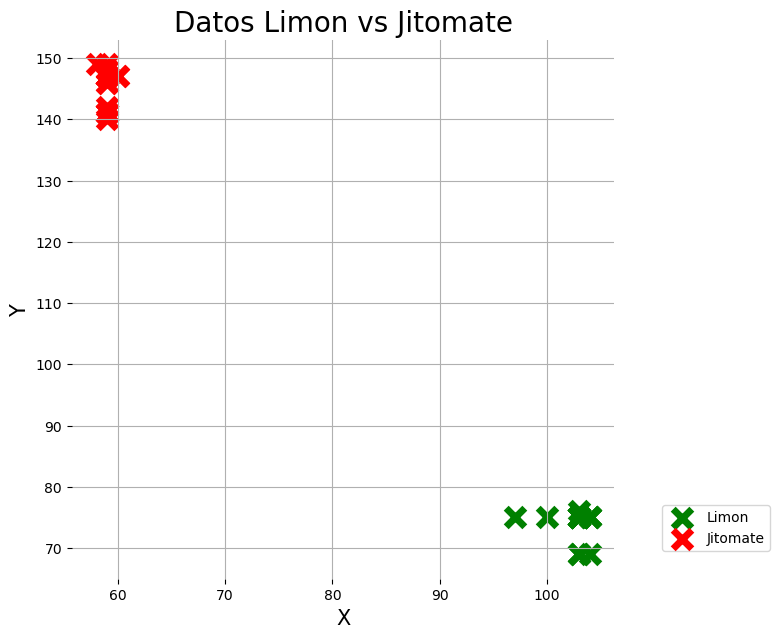

In [7]:
response=np.array(tRes)
plt.figure(figsize=(7, 7))
plt.title("Datos Limon vs Jitomate", fontsize=20)
plt.scatter(p[:, response == 0][0], p[:, response == 0][1],
            marker="x", s=180, color="green", linewidths=5, label="Limon")

plt.scatter(p[:, response == 1][0], p[:, response == 1][1],
            marker="x", s=180, color="red", linewidths=5, label="Jitomate")

plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.grid()
plt.show()


In [9]:
def hardlim(w, dato, b):
    z = w * dato
    if z.sum() + b > 0:
        return 1
    else:
        return 0
    
pesos = np.random.uniform(-1, 1, size=3)
bias = np.random.uniform(-1,1)

pesos, b, hardlim(pesos, [59, 147, 119], bias)

(array([-0.07624258, -0.46424205,  0.94001292]), array([-0.66320913]), 1)

In [45]:
pesosEspecificos = np.array([-0.67858583, -0.41029803,  0.9240771 ])
biasEspecifico = np.array([0.67065113])
learningRate = 0.01
epocas = 100

for epoca in range(epocas):
    totalErrors = 0
    for i in range(len(pArr)):
        prediction = hardlim(pesos, pArr[i], bias)
        error = response[i] - prediction
        totalErrors += error**2
        
        pesos[0] += learningRate * pArr[i][0] * error
        pesos[1] += learningRate * pArr[i][1] * error
        pesos[2] += learningRate * pArr[i][2] * error
        
        bias += learningRate * error
    print(totalErrors, end=" ")
        
hardlim(pesosEspecificos, [59, 146, 117], biasEspecifico)

def perceptronFinal(dato):
    if hardlim(pesos, dato, bias) == 1:
        return "Jitomate"
    else: 
        return "Limón"

print("Pesos: ",pesosEspecificos)
print("Bias: ",biasEspecifico)
print("Respuesta perceptrón: ",perceptronFinal([59, 146, 117]))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 Pesos:  [-0.67858583 -0.41029803  0.9240771 ]
Bias:  [0.67065113]
Respuesta perceptrón:  Jitomate


In [44]:
print(type(np.array([-0.67858583, -0.41029803,  0.9240771 ])))

<class 'numpy.ndarray'>
